<table><tbody><tr><th><p><img alt="Emblema" src="https://cdn6.aptoide.com/imgs/6/f/4/6f4821daa840da8fe971445350759fe5_icon.png" style="width:150px;"></p></th><th><p><strong>Inteligencia Artificial</strong></p><p><strong>Grado en Ingeniería Informática en Sistemas de Información – Curso 2024/2025</strong></p><p><strong>ENSEÑANZAS PRÁCTICAS Y DE DESARROLLO</strong></p><h1>EPD 7: Búsqueda - Herramientas para la Inteligencia Artificial</h1></th></tr></tbody></table>

____

## Objetivos
- Introducción a la librería AIMA para búsquedas.
- Introducción a la herramienta Search de AISPACE.
- Resolver problemas de búsquedas con las clases AIMA.
- Crear árboles de búsqueda y recorrerlos con la herramienta Search de AISPACE.

___

## Bibliografía Básica
[1] Inteligencia Artificial: Un enfoque Moderno 2ª Ed. Stuart Russell, Peter Norvig. Pearson Prentice Hall, 2011.
Capítulos 2 y 3.
____

## Conceptos

----

## 1. Implementación python AIMA
En el paquete “aima-python” (https://github.com/aimacode/aima-python) se pueden encontrar la implementación Python de los algoritmos descritos en el libro “Artificial Intelligence - A Modern Approach”, escrito por Norvig y Russell. En la siguiente dirección web
(http://aima.cs.berkeley.edu) se localiza toda la información de este proyecto. El código se encuentra disponibles en otros lenguajes, todos almacenados de forma pública en la plataforma GitHub, donde se indica la situación actual de cada proyecto y una guía de instalación.

En este libro, y su web, se explora la Inteligencia Artificial en toda su amplitud del campo, que abarca lógica, probabilidad, razonamiento, aprendizaje, y un largo etcétera. En nuestro caso solo usaremos la parte de búsqueda, por lo que para simplificar solo usaremos un par de ficheros de código fuente Python donde se encuentra el código que necesitamos para nuestros proyectos. En http://aimacode.github.io/aima-javascript/3-Solving-Problems-By-Searching/ se pueden encontrar ejemplos de búsquedas donde se puede practicar de manera visual con los diferentes algoritmos.

## 2. 2. Resolver problemas mediante búsquedas
Muchas tareas de Inteligencia Artificial se pueden formular como un problema de búsqueda, como, por ejemplo, puzles, juegos, navegación, scheduling, routing.

Normalmente, suponemos que las propiedades del entorno de trabajo de una búsqueda básica son completamente observable, determinista, estático, discreto y no multiagente (ver tema 2 de [1]). Es decir, se dispone de toda la información necesaria sobre el dominio del problema y cada estado es una completa descripción del mundo que se representa; no interviene la aleatoriedad; el agente no necesita estar pendiente del mundo mientras toma una decisión sobre la acción a tomar; y sólo es necesario un agente.

Recomendamos rellenar la plantilla que se muestra a continuación antes de empezar a resolver un problema:
    
**NOMBRE DEL PROBLEMA**: nombre <br/>
**Estados**: indicar cómo va a estar representado un estado.<br/>
**Estado inicial**: el estado por el que empieza un agente.<br/>
**Acciones**: una descripción de las posibles acciones disponibles para el agente.<br/>
**Modelo de transición**: estado resultante de realizar una acción en un estado determinado.<br/>
**Función objetivo**: determina si un estado determinado es un objetivo. Algunas veces existe un conjunto explícito de estados objetivo.<br/>
**Coste**: si no se indica lo contrario, el coste es 1, por lo que el coste del camino será el número de pasos dados en el camino.<br/>
**Observaciones**: cualquier aclaración que se quiera realizar, como por ejemplo detalles de implementación.<br/>

Para la representación del entorno debemos preguntarnos qué información de los sensores es importante y cómo representar el conocimiento del dominio. Un **estado** del problema es una representación de todo lo necesario acerca del entorno mientras que el
**espacio de estado** o espacio del problema, son todas las configuraciones válidas posibles del entorno. Además, debemos tener claro de antemano qué objetivo quiere lograr el agente, ya sea alcanzar un estado, satisfacer un conjunto de propiedades o lograr una
tarea. Finalmente, el hecho de que supongamos que el entorno es discreto y determinista implica que, dada una descripción del estado actual del mundo del problema, se sabe si una acción es aplicable (legal), y a qué estado exacto se pasará después de ejecutar
la acción.

En definitiva, el estado inicial, las acciones y el modelo de transición juntos definen implícitamente el espacio de estados del problema, es decir, el conjunto de estados alcanzable desde el estado inicial por una secuencia de acciones. El **espacio de estados** forma una red dirigida o **grafo, donde los nodos son los estados y los arcos son las acciones.

### 3. Implementación de búsquedas
Los ficheros Python necesarios son:
- search.py: implementa el material de apoyo para los temas tratados en el Capítulo 3 - Resolver problemas mediante la búsqueda y el Capítulo 4 del libro.
- utils.py: proporciona algunas utilidades ampliamente empleadas por otros módulos.

En el fichero search.py se encuentran varios algoritmos de búsqueda de propósito general, que pueden clasificarse en dos tipos:
- Métodos de búsqueda no informada: exploran el espacio de búsqueda sin tener más información sobre el problema que su definición. Ejemplos: búsqueda en anchura, búsqueda en profundidad y búsqueda de coste uniforme
- Métodos de búsqueda informada: este tipo de algoritmos aprovechan cualquier información (heurística, coste del camino) sobre el problema para buscar en el espacio de búsqueda y encontrar la solución de forma eficiente. Ejemplos: búsqueda del mejor primero y búsqueda A*.

La forma de utilizar este código es definir un problema para lo que se debe heredar de la clase Problem, luego se instancia la nueva
clase y se resuelve mediante llamadas a las diversas funciones de búsqueda. La clase Problem tiene seis métodos:
1. \_\_init\_\_(self, initial, goal) : constructor. Se especifica el estado inicial del problema de búsqueda donde el agente comienza su tarea de exploración para encontrar el(los) estado(s) objetivo(s) que está(n) dado(s) en el parámetro objetivo.
2. actions(self, state) : genera un conjunto de acciones permitidas para un estado particular
3. result(self, state, action) : genera el estado que resulta de realizar una acción determinada a partir del estado facilitado.
4. goal_test(self, state) : devuelve un valor booleano señalando si se ha llegado al estado objetivo.
5. path_cost(self, c, state1, action, state2) : devuelve el coste del camino que llega al estado2 como resultado de tomar una acción desde el estado1.
6. value(self, state) : información extra en los problemas en los que tratamos de optimizar un valor cuando no podemos hacer utilizar goal_test.

En el propio fichero search.py podemos encontrar varios ejemplos de aplicación de los algoritmos de búsquedas, entre los que se
encuentra el juego EightPuzzle, que consiste en deslizar fichas numeradas del 1 al 8 en un tablero de 3x3, donde una de las casillas
es un espacio en blanco. Un estado se representa como una tupla de longitud 9, donde el elemento en el índice i representa el número
de baldosa en el índice i (0 si es una casilla vacía). A continuación, se muestra el código de la clase EightPuzzle, donde se redefinen
los métodos de la clase Problem de la que hereda, que nos servirá de ejemplo para resolver otros problemas de búsqueda.

```python
class EightPuzzle(Problem):
    """ The problem of sliding tiles numbered from 1 to 8 on a 3x3 board, where one of the squares is a blank. A state is represented as a tuple of length 9, where element at index i represents the tile number at index i (0 if it's an empty square) """
    def __init__(self, initial, goal=(1, 2, 3, 4, 5, 6, 7, 8, 0)):
        """ Define goal state and initialize a problem """
        super().__init__(initial, goal)
        
    def find_blank_square(self, state):
        """Return the index of the blank square in a given state"""
        return state.index(0)
            
    def actions(self, state):
        """ Return the actions that can be executed in the given state. The result would be a list, since there are only four possible actions in any given state of the environment """
        possible_actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']
        index_blank_square = self.find_blank_square(state)
        
        if index_blank_square % 3 == 0:
            possible_actions.remove('LEFT')
        if index_blank_square < 3:
            possible_actions.remove('UP')
        if index_blank_square % 3 == 2:
            possible_actions.remove('RIGHT')
        if index_blank_square > 5:
            possible_actions.remove('DOWN')    
            
        return possible_actions
        
    def result(self, state, action):
    """ Given state and action, return a new state that is the result of the action. Action is assumed to be a valid action in the state """
    # blank is the index of the blank square
    blank = self.find_blank_square(state)
    new_state = list(state)
    
    delta = {'UP': -3, 'DOWN': 3, 'LEFT': -1, 'RIGHT': 1}
    neighbor = blank + delta[action]
    new_state[blank], new_state[neighbor] = new_state[neighbor], new_state[blank]
    
    return tuple(new_state)
    
    def goal_test(self, state):
        """ Given a state, return True if state is a goal state or False, otherwise """
        return state == self.goal
        
    def check_solvability(self, state):
        """ Checks if the given state is solvable """
        inversion = 0
        for i in range(len(state)):
            for j in range(i + 1, len(state)):
                if (state[i] > state[j]) and state[i] != 0 and state[j] != 0:
                    inversion += 1
        return inversion % 2 == 0
 
    def h(self, node):
        """ Return the heuristic value for a given state. Default heuristic function used is h(n) = number of misplaced tiles """
        return sum(s != g for (s, g) in zip(node.state, self.goal))
```

Finalmente, con la llamada al método de búsqueda correspondiente, pasándole solo el punto de partida al estar fijado ya el estado objetivo en la llamada al constructor, se obtiene la solución de la siguiente manera:

<p style="border: 1px solid black; padding:10px">
puzzle = EightPuzzle((2, 4, 3, 1, 5, 6, 7, 8, 0)) <br/>
print("Resultados con breadth_first_tree_search:", breadth_first_tree_search(puzzle).solution())<br/>
Resultados con breadth_first_tree_search: ['UP', 'LEFT', 'UP', 'LEFT', 'DOWN', 'RIGHT', 'RIGHT', 'DOWN']
</p>

### 4. Herramientas AIspace
Estas herramientas son para aprender y explorar conceptos de inteligencia artificial. Se han desarrollado en el Laboratorio de Inteligencia Computacional de la Universidad de British Columbia, bajo la dirección de Alan Mackworth y David Poole. Estas herramientas son parte de los recursos en línea para Inteligencia Artificial: Fundamentos de Agentes Computacionales.

Toda la información de estas herramientas está disponible en la página http://www.aispace.org, y un vídeo introductorio en http://www.youtube.com/watch?v=Y0xjhDVc4oI.

En esta práctica utilizaremos la herramienta “Graph Searching”. Los grafos son comunes en los problemas que surgen en Inteligencia Computacional e Informática en general. Este applet examina el problema de encontrar un camino de manera eficiente desde un nodo a otro. Esto le permite crear un gráfico y luego tratar una variedad de algoritmos de búsqueda gráfica para encontrar un camino desde un nodo inicial a un nodo objetivo.

A continuación, se muestra parte de la pantalla principal, y en la página de ayuda del portal (http://www.aispace.org/search/help/general.shtml) se indican las instrucciones de uso.

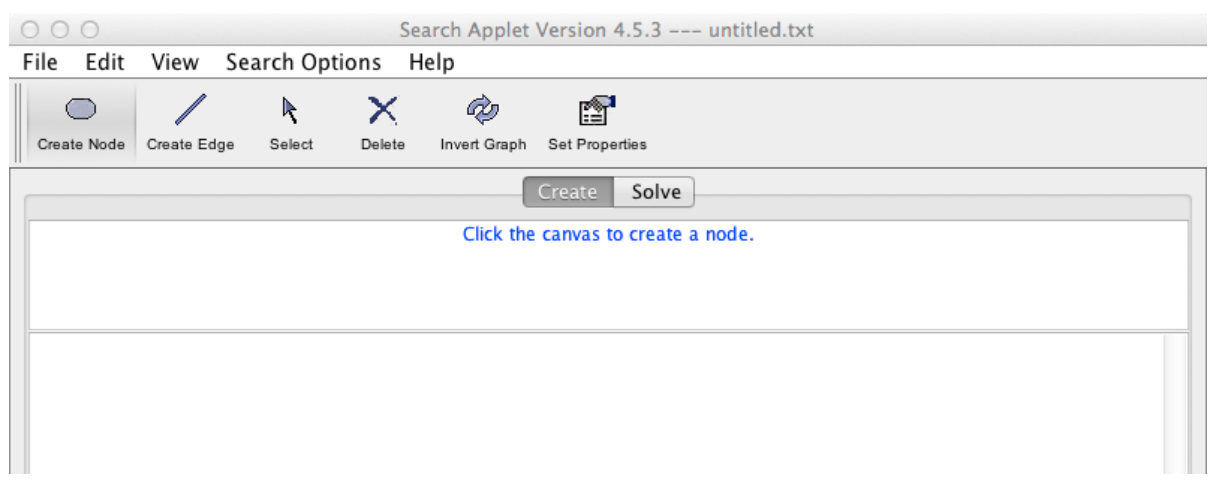

In [2]:
import numpy as np
import pandas as pd
import scipy.io as sio
import scipy.optimize as opt
import time
from search import *

## Experimentos

#### EX01. 
Realice pruebas con los diferentes métodos de búsquedas no guiados. Como se hizo en la primera EPD de esta asignatura, utilice time.time() de la librería time para comparar el tiempo empleado por cada método, siendo conveniente realizar varias ejecuciones con diferentes puntos de partidas para apreciar mejor las diferencias temporales, por ejemplo, (2, 4, 3, 1, 5, 6, 7, 8, 0), (1, 2, 3, 4, 5, 6, 0, 7, 8), (1, 2, 3, 4, 5, 7, 8, 6, 0). 

##### Solución:

In [6]:
p1 = EightPuzzle(((2, 4, 3, 1, 5, 6, 7, 8, 0)))
p2 = EightPuzzle(((1, 2, 3, 4, 5, 6, 0, 7, 8)))
p3 = EightPuzzle(((1, 2, 3, 4, 5, 7, 8, 6, 0)))
start = time.time()
sol_p3_anchura = breadth_first_tree_search(p3)
print("Tiempo: ", time.time() - start)
print(sol_p3_anchura.solution())
sol_p1_anchura = breadth_first_tree_search(p1)
print("Tiempo: ", time.time() - start)
print(sol_p1_anchura.solution())

start = time.time()
sol_p2_anchura = breadth_first_tree_search(p2)
print("Tiempo: ", time.time() - start)
print(sol_p2_anchura.solution())

Tiempo:  2.603107213973999
['LEFT', 'LEFT', 'UP', 'RIGHT', 'RIGHT', 'DOWN', 'LEFT', 'UP', 'LEFT', 'DOWN', 'RIGHT', 'RIGHT']
Tiempo:  2.618767261505127
['UP', 'LEFT', 'UP', 'LEFT', 'DOWN', 'RIGHT', 'RIGHT', 'DOWN']
Tiempo:  0.0
['RIGHT', 'RIGHT']


#### EX02.
Crear el siguiente árbol visto en clase de teoría y explorar todas las opciones posibles con la herramienta “Search” de AIspace. Recordar que los nodos G son los objetivos.

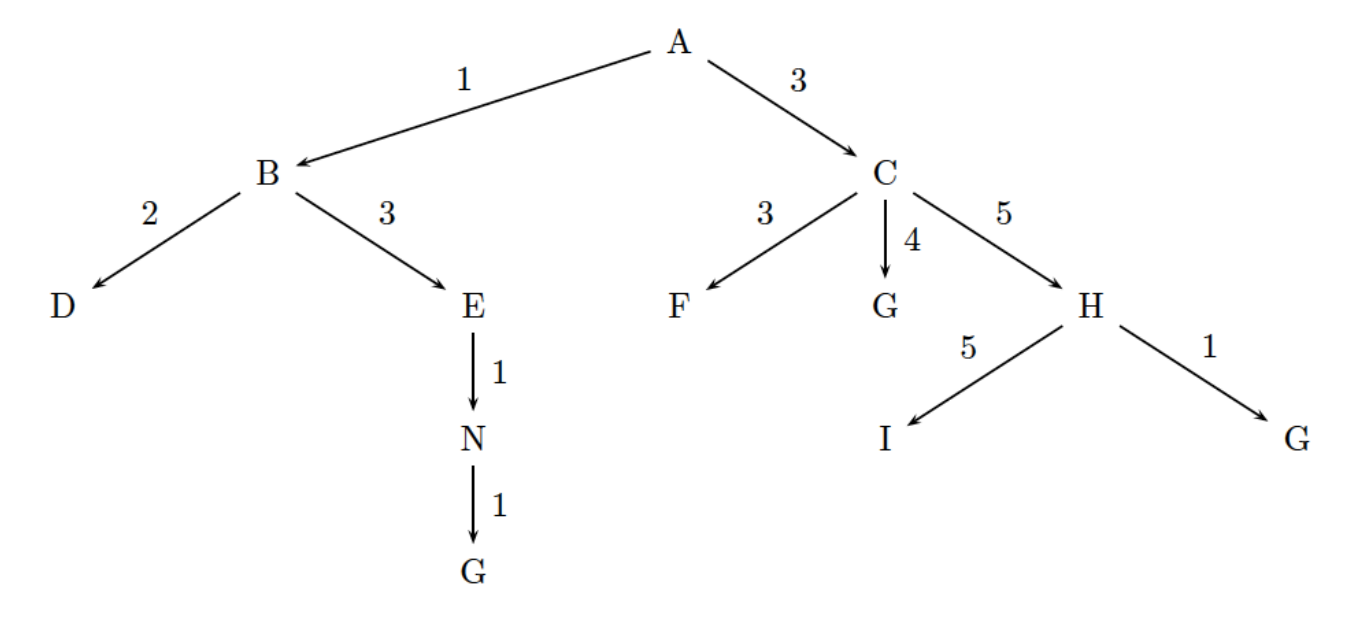


## Ejercicios
#### EJ01.
Tres misioneros y tres caníbales hacen un viaje juntos, pero el camino está cortado por un rio. En la orilla encuentran una lancha que los ayuda a pasar, pero sólo puede llevar dos a la vez y existe el peligro de que, en cualquier orilla, si los caníbales son más numerosos que los misioneros, estos últimos pueden servir de alimento. Implementar en Python la solución utilizando AIMA y probar con los distintos algoritmos de búsqueda no informada.

##### Solución:

In [ ]:
class Misioneros(Problem):
    
    def getMinioneros(self, state)
    
    def __init__(self, initial=(3,3,1), goal=(0,0,0)):
        """ Define goal state and initialize a problem """
    #...

    def actions(self, state):
        """ Return the actions that can be executed in the given state.
        The result would be a list """
    #...

    def result(self, state, action):
        """ Given state and action, return a new state that is the result of the action.
        Action is assumed to be a valid action in the state """
    #...

    def goal_test(self, state):
        """ Given a state, return True if state is a goal state or False, otherwise """
    #...


In [ ]:
print('Problema de los Misioneros y los Caníbales.')
#...


#### EJ02.
Generar en la herramienta “Search” el árbol de sucesores del problema de los misioneros y los caníbales. Trabajar los distintos recorridos. 

## Problemas
#### P01.
Se dispone de dos cántaros de agua, uno de 4 litros y otro de 3 litros de capacidad, siendo esta la única información que se tiene de los mismos. Existe una bomba de agua con la que se pueden llenar los cántaros. Se desea que el cántaro de 4 litros de capacidad quede lleno por la mitad y el de 3 litros vacío.

Abordar esta cuestión como un problema de búsqueda en un espacio de estados. Representar el árbol de búsqueda con la herramienta “Search” de AIspace, implementar en Python la solución utilizando AIMA y realizar una comparativa de los distintos algoritmos de búsqueda no informada.

##### Solución:

#### P02.
Hace mucho tiempo un granjero fue al mercado y compró un lobo, una cabra y una col. Para volver a su casa tenía que cruzar un río. El granjero dispone de una barca para cruzar a la otra orilla, pero en la barca solo caben él y una de sus compras. Si el lobo se queda solo con la cabra se la come, y si la cabra se queda sola con la col se la come. El reto del granjero era cruzar él mismo y dejar sus compras a la otra orilla del río, dejando cada compra intacta. ¿Cómo lo hizo? Representar el árbol de búsqueda con la herramienta “Search” de AIspace, implementar en Python la solución utilizando AIMA y realizar una comparativa de los distintos algoritmos de búsqueda no informada.